In [1]:
import pandas as pd
import os

## Code to get data from one file

In [3]:
def extract_data(filepath): 
#Extract the data from a single simulation output 
    # print(filepath)
    data=pd.read_excel(filepath, skiprows=[0,1,2], index_col=0) #skip the first 3 rows of the file, set the first column as the index column
     

    # drop first three columns 
    # these are the empty "format" column, the units column, and the initial configuration, which we don't care about
    # (remember the original first column is the index column now, so it doesn't get dropped)
    data.drop(data.columns[0:3], axis=1, inplace=True) 
    
    data = data.transpose() #transpose the data so that the columns are the variables and the rows are the data points
    return data 


In [4]:
def extract_data_2(filepath): 
#Extract the data from a single simulation output 
    # print(filepath)
    data=pd.read_excel(filepath, skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], index_col=0) #skip the first 3 rows of the file, set the first column as the index column
     

    # drop first three columns 
    # these are the empty "format" column, the units column, and the initial configuration, which we don't care about
    # (remember the original first column is the index column now, so it doesn't get dropped)
    data.drop(data.columns[0:3], axis=1, inplace=True) 
    
    data = data.transpose() #transpose the data so that the columns are the variables and the rows are the data points
    return data 

## Code to loop over folder and concatenate data (untested)

In [5]:
filepath = "C:/Users/ankur/OneDrive/Documents/Solidworks Config generations and Results 30%/Configs and results 2 30%/results 2 30%/new filetype" #path to the folder containing the files
filenames = os.listdir(filepath)
all_data = [] #list to store the data from all the files
for f in filenames:
    if f.endswith(".xlsx"):
        print(f"Loading file: {f}")
        data = extract_data(f"{filepath}/{f}") #format the exact path using the folder path + / + the file name
        all_data.append(data) #append the data to the list of all data
all_data = pd.concat(all_data, axis = 0) #concatenate all the data into a single dataframe

all_data.index = range(len(all_data)) #rename indices to avoid issues with duplicates
all_data



Loading file: 1001-2000 2 30% new.xlsx
Loading file: 2001-3000 2 30% new.xlsx
Loading file: 3001-4000 2 30% new.xlsx
Loading file: 4001-5000 2 30% new.xlsx


,cut 3,cut 2,cut 1,diamond,Cut2_to_Top,Cut2_to_Cut3,Cut1_to_Diamond,Displacement4,Stress4,Mass3
0,19.91868,33.22566,40.69056,35.22798,16.94894,24.05912,31.23588,-2.126,21.04,93.38
1,22.88962,23.19807,44.83895,56.28082,12.26751,17.76598,29.86856,-2.730,25.51,82.86
2,55.95612,39.33677,42.01864,47.40645,10.56435,18.35673,17.14532,-2.425,24.84,75.54
3,26.00999,30.22451,44.61681,50.36019,12.88949,16.78163,30.71649,-2.486,22.76,84.62
4,28.13147,42.88168,31.00824,30.83574,11.02044,14.81101,32.82180,-2.325,25.12,93.57
...,...,...,...,...,...,...,...,...,...,...
3999,57.82514,23.72746,48.17943,44.96533,16.15271,14.67983,15.69500,-2.343,25.96,76.55
4000,31.70644,40.66130,39.15084,34.52286,17.14512,15.52482,24.71420,-2.190,23.30,89.95
4001,42.75364,38.62500,45.55592,37.52035,15.80579,14.68691,18.05290,-2.238,23.80,84.06
4002,29.12727,43.91183,26.55352,28.04726,14.68081,19.16128,31.45083,-2.181,22.43,94.83


In [6]:
filepath = "C:/Users/ankur/OneDrive/Documents/Solidworks Config generations and Results 30%/Configs and results 2 30%/results 2 30%" #path to the folder containing the files
filenames = os.listdir(filepath)
for f in filenames:
    if f.endswith(".xlsx"):
        print(f"Loading file: {f}")
        data2 = extract_data_2(f"{filepath}/{f}") #format the exact path using the folder path + / + the file name

data2.index = range(len(data2)) #rename indices to avoid issues with duplicates
data2

Loading file: 1-1000 2 30% new.xlsx


,cut 3,cut 2,cut 1,diamond,Cut2_to_Top,Cut2_to_Cut3,Cut1_to_Diamond,Displacement4,Stress4,Mass3
0,24.491,25.006,40.098,48.642,17.364,28.583,19.487,-2.235,20.86,87.86
1,46.517,40.561,46.414,29.929,15.165,14.735,17.321,-2.234,24.15,84.80
2,60.395,37.660,32.578,32.534,16.704,15.820,25.363,-2.232,26.18,82.56
3,23.707,47.396,42.834,46.807,15.066,19.449,15.389,-2.394,22.93,84.13
4,49.251,55.232,44.403,35.188,11.330,21.026,20.971,-2.380,24.13,79.06
...,...,...,...,...,...,...,...,...,...,...
997,49.047,37.688,49.817,41.180,10.437,15.375,20.170,-2.449,24.38,79.12
998,56.645,52.973,40.194,30.472,11.161,11.776,25.684,-2.459,26.12,79.54
999,36.845,36.266,42.681,45.959,10.230,25.635,20.098,-2.322,22.71,83.52
1000,45.694,32.769,37.213,34.407,13.690,28.109,19.403,-2.097,23.17,87.58


In [7]:
data2 = data2.drop([1001])
data2

,cut 3,cut 2,cut 1,diamond,Cut2_to_Top,Cut2_to_Cut3,Cut1_to_Diamond,Displacement4,Stress4,Mass3
0,24.491,25.006,40.098,48.642,17.364,28.583,19.487,-2.235,20.86,87.86
1,46.517,40.561,46.414,29.929,15.165,14.735,17.321,-2.234,24.15,84.80
2,60.395,37.660,32.578,32.534,16.704,15.820,25.363,-2.232,26.18,82.56
3,23.707,47.396,42.834,46.807,15.066,19.449,15.389,-2.394,22.93,84.13
4,49.251,55.232,44.403,35.188,11.330,21.026,20.971,-2.380,24.13,79.06
...,...,...,...,...,...,...,...,...,...,...
996,64.840,38.633,32.655,40.408,13.363,14.928,17.551,-2.365,30.06,77.29
997,49.047,37.688,49.817,41.180,10.437,15.375,20.170,-2.449,24.38,79.12
998,56.645,52.973,40.194,30.472,11.161,11.776,25.684,-2.459,26.12,79.54
999,36.845,36.266,42.681,45.959,10.230,25.635,20.098,-2.322,22.71,83.52


In [8]:
all_data = pd.concat([all_data, data2], axis = 0) #concatenate all the data into a single dataframe

all_data.index = range(len(all_data)) #rename indices to avoid issues with duplicates
all_data

,cut 3,cut 2,cut 1,diamond,Cut2_to_Top,Cut2_to_Cut3,Cut1_to_Diamond,Displacement4,Stress4,Mass3
0,19.91868,33.22566,40.69056,35.22798,16.94894,24.05912,31.23588,-2.126,21.04,93.38
1,22.88962,23.19807,44.83895,56.28082,12.26751,17.76598,29.86856,-2.730,25.51,82.86
2,55.95612,39.33677,42.01864,47.40645,10.56435,18.35673,17.14532,-2.425,24.84,75.54
3,26.00999,30.22451,44.61681,50.36019,12.88949,16.78163,30.71649,-2.486,22.76,84.62
4,28.13147,42.88168,31.00824,30.83574,11.02044,14.81101,32.82180,-2.325,25.12,93.57
...,...,...,...,...,...,...,...,...,...,...
5000,64.84000,38.63300,32.65500,40.40800,13.36300,14.92800,17.55100,-2.365,30.06,77.29
5001,49.04700,37.68800,49.81700,41.18000,10.43700,15.37500,20.17000,-2.449,24.38,79.12
5002,56.64500,52.97300,40.19400,30.47200,11.16100,11.77600,25.68400,-2.459,26.12,79.54
5003,36.84500,36.26600,42.68100,45.95900,10.23000,25.63500,20.09800,-2.322,22.71,83.52


In [54]:
XD = all_data[['cut 3', 'cut 2', 'cut 1', 'diamond', 'Cut2_to_Top', 'Cut2_to_Cut3', 'Cut1_to_Diamond']]  # multiple features
yD= all_data['Mass3']
XD

,cut 3,cut 2,cut 1,diamond,Cut2_to_Top,Cut2_to_Cut3,Cut1_to_Diamond
0,19.91868,33.22566,40.69056,35.22798,16.94894,24.05912,31.23588
1,22.88962,23.19807,44.83895,56.28082,12.26751,17.76598,29.86856
2,55.95612,39.33677,42.01864,47.40645,10.56435,18.35673,17.14532
3,26.00999,30.22451,44.61681,50.36019,12.88949,16.78163,30.71649
4,28.13147,42.88168,31.00824,30.83574,11.02044,14.81101,32.82180
...,...,...,...,...,...,...,...
5000,64.84000,38.63300,32.65500,40.40800,13.36300,14.92800,17.55100
5001,49.04700,37.68800,49.81700,41.18000,10.43700,15.37500,20.17000
5002,56.64500,52.97300,40.19400,30.47200,11.16100,11.77600,25.68400
5003,36.84500,36.26600,42.68100,45.95900,10.23000,25.63500,20.09800


In [55]:
yD

0       93.38
1       82.86
2       75.54
3       84.62
4       93.57
        ...  
5000    77.29
5001    79.12
5002    79.54
5003    83.52
5004    87.58
Name: Mass3, Length: 5005, dtype: float64

In [10]:
# creating train and test sets 
from sklearn.model_selection import train_test_split
XD_train, XD_test, yD_train, yD_test = train_test_split( 
    XD, yD, test_size=0.3, random_state=4294967295) 

In [11]:
XD_train

,cut 3,cut 2,cut 1,diamond,Cut2_to_Top,Cut2_to_Cut3,Cut1_to_Diamond
1665,47.59481,42.25206,34.06101,46.17642,10.75697,11.89647,32.32867
3298,40.34447,23.19583,32.08891,58.72902,10.55988,19.45837,18.21260
1159,43.11458,42.00108,33.33324,40.82891,11.92666,10.74130,26.45338
2427,48.72993,25.74689,41.04860,33.47625,11.37884,13.82649,33.79261
2815,24.33119,61.02993,28.60044,32.71870,10.23758,23.25642,22.75698
...,...,...,...,...,...,...,...
4310,30.32000,27.78400,32.62000,56.53400,12.39000,15.37500,33.92200
3143,32.14887,23.55357,44.82910,35.95191,16.27150,19.53169,26.71728
3084,38.20147,37.76489,43.31956,41.12856,18.06309,12.05974,27.45187
290,26.60321,33.91355,27.06421,61.18092,12.99191,16.56745,27.98970


In [12]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

pipeD = Pipeline([('polyfeatures', PolynomialFeatures(degree=2)), ('linear', LinearRegression())])
cross_val_score(pipeD, XD_train, yD_train, cv=10)

array([0.99999953, 0.99999972, 0.99999967, 0.99999972, 0.99999965,
       0.99999952, 0.99999973, 0.99999964, 0.99999977, 0.99999966])

In [30]:
pipeD.fit(XD_train, yD_train)

Pipeline(steps=[('polyfeatures', PolynomialFeatures()),
                ('linear', LinearRegression())])

In [31]:
y_predPipeD = pipeD.predict(XD_test) 

R-squared: 1.00


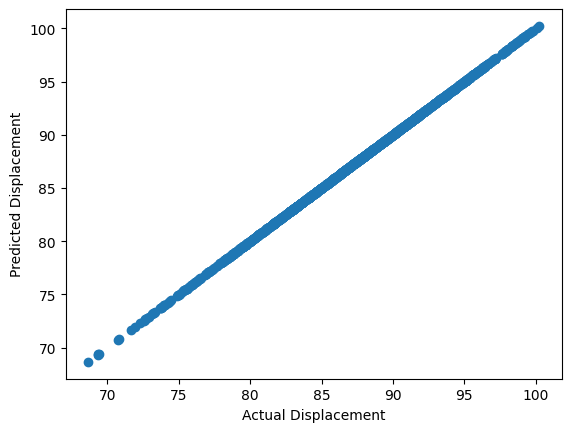

In [32]:
plt.scatter (yD_test, y_predPipeD)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_predPipeD)
print(f'R-squared: {r2:.2f}')

In [33]:
from sklearn.neighbors import KNeighborsRegressor

In [34]:
from sklearn.model_selection import GridSearchCV
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights': ['uniform','distance'],'p':[1,2,5]}]

# Search for best hyperparameters
KNN = GridSearchCV(estimator=KNeighborsRegressor(), 
                      param_grid=hp_candidates, 
                      cv=5,
                      verbose=1,  
                      scoring='r2', 
                      return_train_score=True)
KNN.fit(XD_train, yD_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15],
                          'p': [1, 2, 5], 'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='r2', verbose=1)

In [35]:
y_predKNN = KNN.predict(XD_test) 

R-squared: 0.98


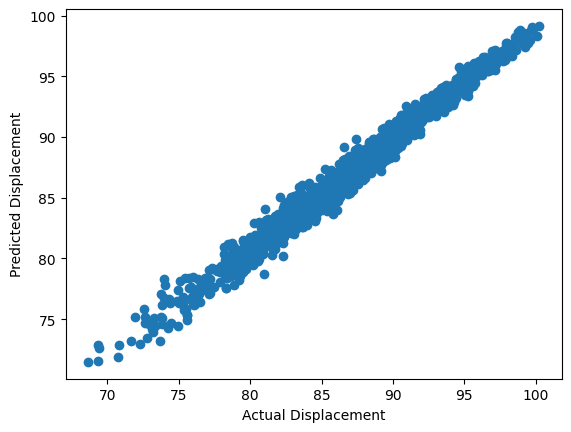

In [36]:
plt.scatter (yD_test, y_predKNN)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_predKNN)
print(f'R-squared: {r2:.2f}')

In [37]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=30)
param_grid = { "n_estimators"      : [250, 300],
           "max_features"      : [3, 5],
           "max_depth"         : [10, 20],
           "min_samples_split" : [2, 4] ,
           "bootstrap": [True, False]}
randF = GridSearchCV(estimator = model, param_grid=param_grid, n_jobs=-1, cv=5, scoring = 'r2')
randF.fit(XD_train, yD_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=30), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20],
                         'max_features': [3, 5], 'min_samples_split': [2, 4],
                         'n_estimators': [250, 300]},
             scoring='r2')

In [38]:
randF.best_score_

0.9777754141830212

In [39]:
y_predrandF = randF.predict(XD_test) 

R-squared: 0.98


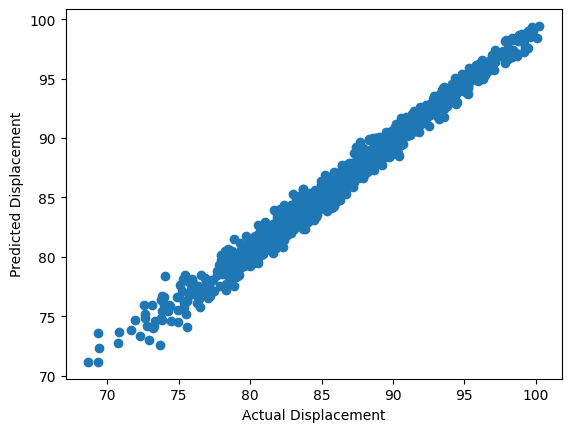

In [40]:
plt.scatter (yD_test, y_predrandF)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_predrandF)
print(f'R-squared: {r2:.2f}')

In [41]:
from sklearn.neural_network import MLPRegressor

In [42]:
# Fitting a Regression model to the train data

param_list = {"hidden_layer_sizes": [1,50], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]}
MLP = GridSearchCV(
    estimator=MLPRegressor(max_iter=10000, n_iter_no_change=30),
    param_grid=param_list,
    n_jobs=-1,
    cv=5,
    verbose=5,
    scoring ='r2')
MLP.fit(XD_train, yD_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\ankur\OneDrive\Documents\To_PO\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
20 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ankur\OneDrive\Documents\To_PO\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ankur\OneDrive\Documents\To_PO\.venv\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ankur\OneDrive\Documents\To_PO\.venv\L

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=10000, n_iter_no_change=30),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [5e-05, 0.0005],
                         'hidden_layer_sizes': [1, 50],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='r2', verbose=5)

In [43]:
MLP.best_score_

0.9985816061238382

In [44]:
y_predMLP = MLP.predict(XD_test) 

R-squared: 0.99


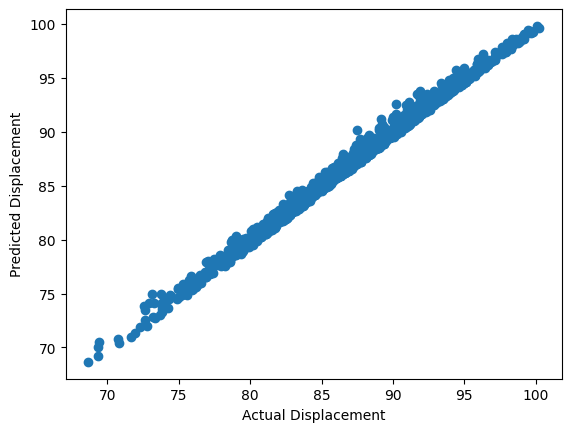

In [45]:
plt.scatter (yD_test, y_predMLP)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_predMLP)
print(f'R-squared: {r2:.2f}')

In [46]:

## importing class from library
from sklearn.tree import DecisionTreeRegressor

## Setting optimum values for parameters.
param_grid = {
    'max_depth': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

## creating instance
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring = 'r2')

## fitting data 
# grid_search.fit(x, y)

grid_search.fit(XD_train, yD_train)

## getting best parameters 
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [47]:
DTR = DecisionTreeRegressor(max_depth = 10, min_samples_split = 5, min_samples_leaf = 4)

In [48]:
DTR.fit(XD_train, yD_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5)

In [49]:
y_predDTR = DTR.predict(XD_test) 

R-squared: 0.93


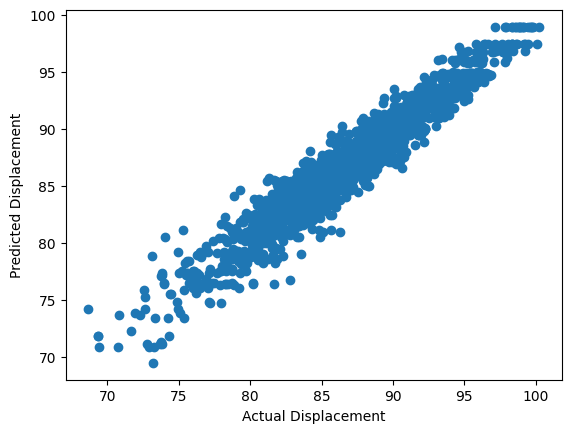

In [50]:
plt.scatter (yD_test, y_predDTR)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_predDTR)
print(f'R-squared: {r2:.2f}')

In [51]:
import autogluon as ag
from autogluon.tabular import TabularDataset, TabularPredictor

c:\Users\ankur\OneDrive\Documents\To_PO\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [56]:
ag_data = all_data.drop(columns=['Displacement4', 'Stress4'])
ag_data

,cut 3,cut 2,cut 1,diamond,Cut2_to_Top,Cut2_to_Cut3,Cut1_to_Diamond,Mass3
0,19.91868,33.22566,40.69056,35.22798,16.94894,24.05912,31.23588,93.38
1,22.88962,23.19807,44.83895,56.28082,12.26751,17.76598,29.86856,82.86
2,55.95612,39.33677,42.01864,47.40645,10.56435,18.35673,17.14532,75.54
3,26.00999,30.22451,44.61681,50.36019,12.88949,16.78163,30.71649,84.62
4,28.13147,42.88168,31.00824,30.83574,11.02044,14.81101,32.82180,93.57
...,...,...,...,...,...,...,...,...
5000,64.84000,38.63300,32.65500,40.40800,13.36300,14.92800,17.55100,77.29
5001,49.04700,37.68800,49.81700,41.18000,10.43700,15.37500,20.17000,79.12
5002,56.64500,52.97300,40.19400,30.47200,11.16100,11.77600,25.68400,79.54
5003,36.84500,36.26600,42.68100,45.95900,10.23000,25.63500,20.09800,83.52


In [57]:
ag_train, ag_test = train_test_split(ag_data, test_size=0.3, random_state=254)
ag_train

,cut 3,cut 2,cut 1,diamond,Cut2_to_Top,Cut2_to_Cut3,Cut1_to_Diamond,Mass3
3405,19.99324,27.76485,35.22248,36.85703,14.01519,26.21694,15.61473,94.96
2329,18.81625,31.56074,38.79395,60.02581,19.03227,15.81688,19.29132,81.92
2071,20.14250,28.37549,26.71004,29.62164,10.56987,22.48519,30.00853,99.15
894,31.84933,25.50630,32.42331,43.14149,15.58317,10.42389,26.82765,90.51
2213,53.08311,49.69466,45.29877,30.63348,13.07843,16.80688,16.31809,80.34
...,...,...,...,...,...,...,...,...
391,45.10930,27.79219,36.01724,29.06696,15.22054,21.82433,31.42851,90.62
3775,26.83788,49.58353,49.65393,38.23782,11.01012,27.04446,22.02359,84.61
582,47.43151,43.18588,39.43394,22.80548,11.43640,24.91258,16.89255,87.89
2154,55.00216,34.08778,49.06923,37.64250,11.76093,20.18633,15.08831,79.14


In [58]:
predictor_ag =  TabularPredictor(label='Mass3').fit(ag_train, time_limit=600, presets='medium_quality')

No path specified. Models will be saved in: "AutogluonModels\ag-20240802_143704"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          22
Memory Avail:       6.92 GB / 31.61 GB (21.9%)
Disk Space Avail:   549.81 GB / 951.65 GB (57.8%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels\ag-20240802_143704"
Train Data Rows:    3503
Train Data Columns: 7
Label Column:       Mass3
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (101.34, 67.84, 86.93941, 5.71687)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may speci

[1000]	valid_set's rmse: 0.318935
[2000]	valid_set's rmse: 0.298599
[3000]	valid_set's rmse: 0.292648
[4000]	valid_set's rmse: 0.290071
[5000]	valid_set's rmse: 0.288714
[6000]	valid_set's rmse: 0.287669
[7000]	valid_set's rmse: 0.287031
[8000]	valid_set's rmse: 0.286734
[9000]	valid_set's rmse: 0.286365
[10000]	valid_set's rmse: 0.286185


	-0.2862	 = Validation score   (-root_mean_squared_error)
	31.27s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 564.6s of the 564.6s of remaining time.


[1000]	valid_set's rmse: 0.398046
[2000]	valid_set's rmse: 0.395809


	-0.3958	 = Validation score   (-root_mean_squared_error)
	8.72s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 555.74s of the 555.74s of remaining time.
	-0.7938	 = Validation score   (-root_mean_squared_error)
	0.71s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 554.87s of the 554.87s of remaining time.
	-0.1775	 = Validation score   (-root_mean_squared_error)
	73.17s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 481.66s of the 481.66s of remaining time.
	-0.6452	 = Validation score   (-root_mean_squared_error)
	0.56s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 480.96s of the 480.96s of remaining time.
	-0.2125	 = Validation score   (-root_mean_squared_error)
	4.0s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost 

[1000]	valid_set's rmse: 0.698311
[2000]	valid_set's rmse: 0.698241
[3000]	valid_set's rmse: 0.698239
[4000]	valid_set's rmse: 0.698239
[5000]	valid_set's rmse: 0.698239
[6000]	valid_set's rmse: 0.698239
[7000]	valid_set's rmse: 0.698239
[8000]	valid_set's rmse: 0.698239
[9000]	valid_set's rmse: 0.698239


	-0.6982	 = Validation score   (-root_mean_squared_error)
	79.99s	 = Training   runtime
	0.25s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 371.61s of remaining time.
	Ensemble Weights: {'CatBoost': 0.45, 'NeuralNetFastAI': 0.35, 'LightGBMXT': 0.15, 'NeuralNetTorch': 0.05}
	-0.1402	 = Validation score   (-root_mean_squared_error)
	0.05s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 228.47s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 7267.6 rows/s (500 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels\ag-20240802_143704")


In [59]:
ag_pred = predictor_ag.predict(ag_test.drop(columns=['Mass3']))

In [60]:
predictor_ag.evaluate(ag_test, silent=True)

{'root_mean_squared_error': -0.15836402403182795,
 'mean_squared_error': -0.025079164107553377,
 'mean_absolute_error': -0.09864589015589872,
 'r2': 0.9992636271704296,
 'pearsonr': 0.9996529859443839,
 'median_absolute_error': -0.0743255615234375}